<a href="https://colab.research.google.com/github/ehpub/KFQ_MLDL_2023/blob/main/2023_kfq_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%82%98%EC%9D%B4%EB%B8%8C%EB%B2%A0%EC%9D%B4%EC%A6%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

강의 교재 : https://wikibook.co.kr/mymlrev/

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.datasets import load_iris

In [15]:
iris = load_iris()

In [19]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = iris.target
df['target'] = df['target'].map({0:'setosa' ,
                                 1:"versicolor",
                                 2:"virginica"})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [20]:
seto_df = df[df['target'] == 'setosa']
vers_df = df[df['target'] == 'versicolor']
virg_df = df[df['target'] == 'virginica']

In [21]:
seto_df.shape, vers_df.shape, virg_df.shape

((50, 5), (50, 5), (50, 5))

In [22]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

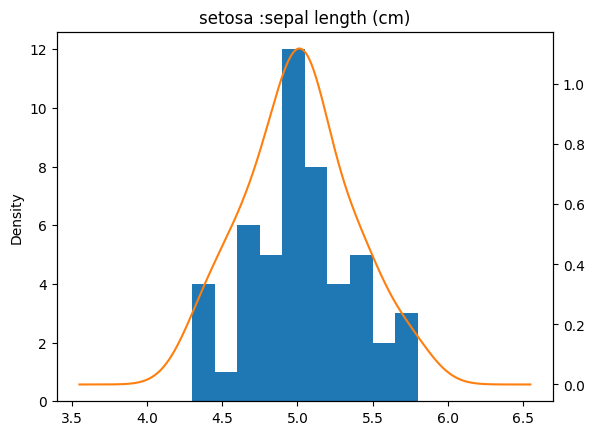

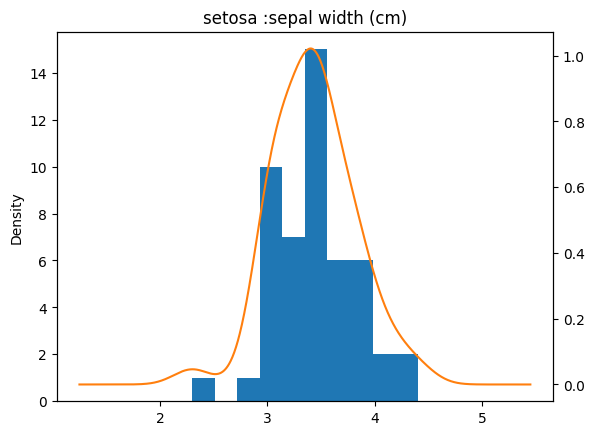

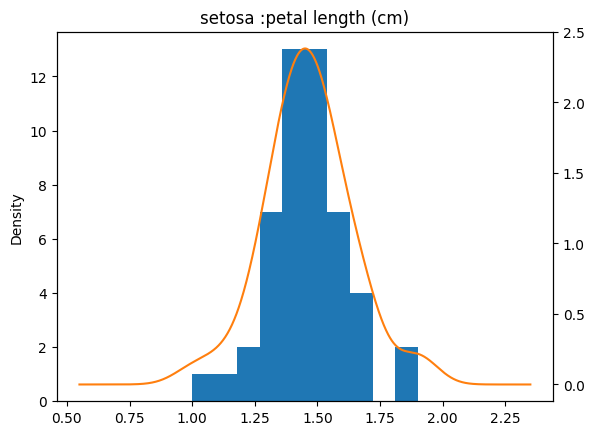

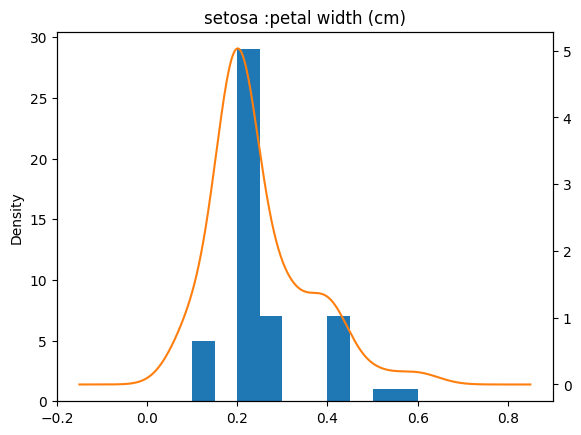

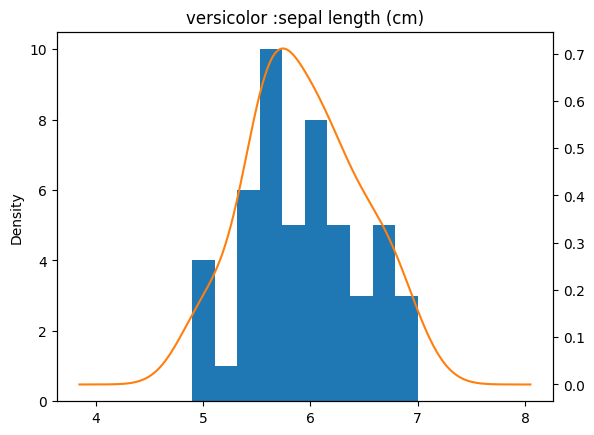

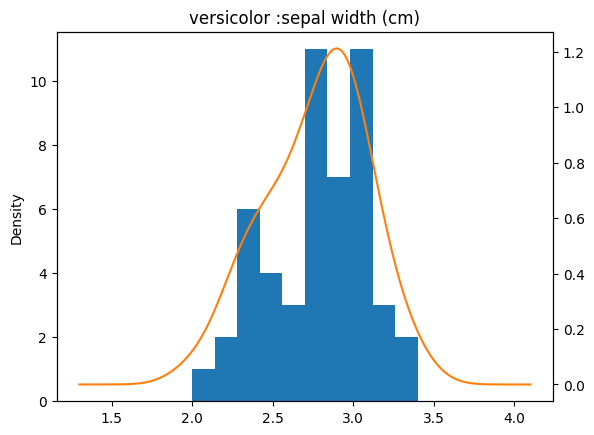

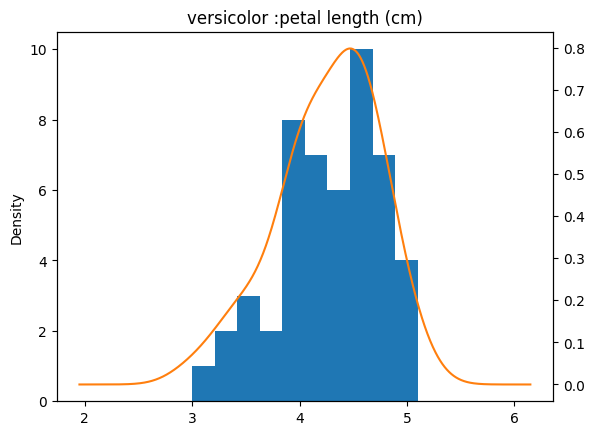

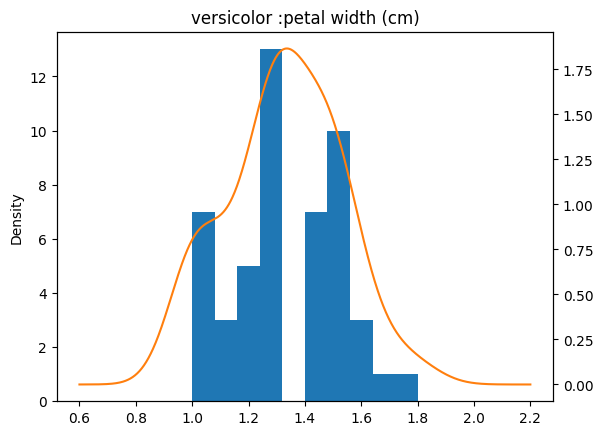

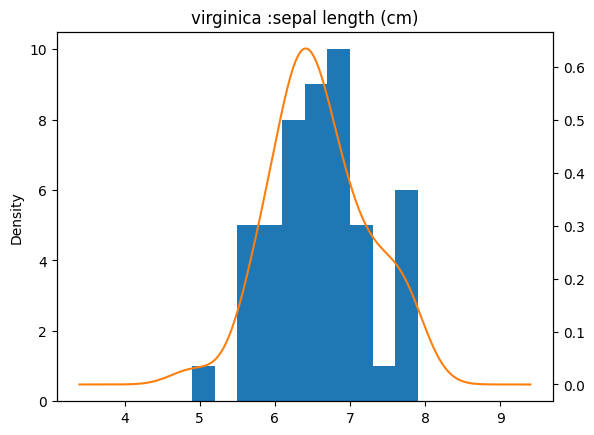

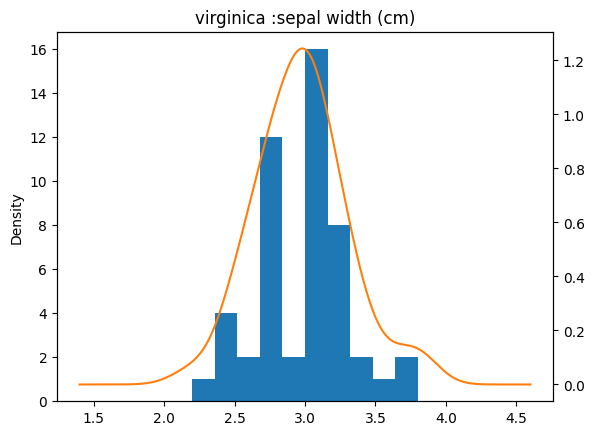

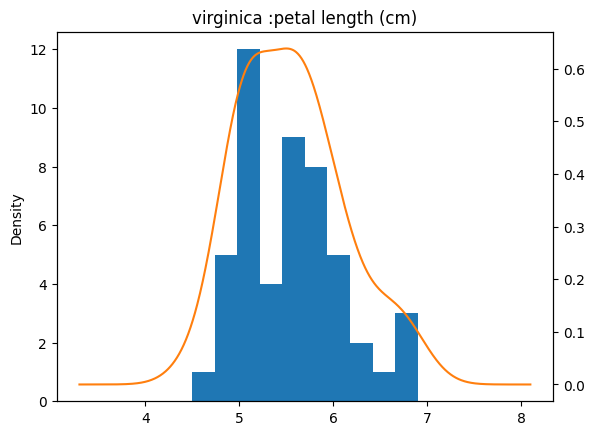

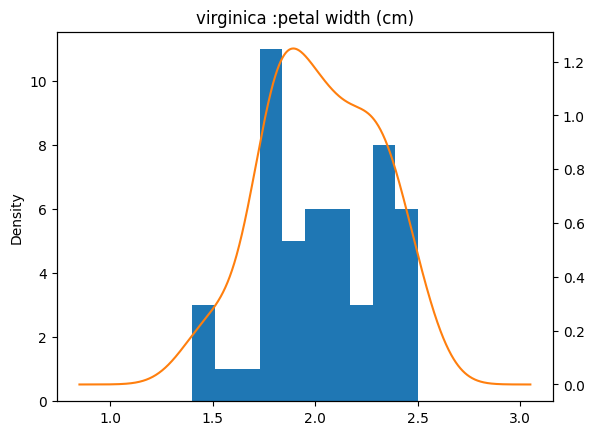

In [30]:
for tb in ['setosa','versicolor','virginica']:
  sdf = df[df['target'] == tb]
  for column in df.columns[:-1]:
    _, ax = plt.subplots()
    sdf[column].plot(kind='hist',ax=ax)
    sdf[column].plot(kind='kde',
                       ax = ax,
                       secondary_y=True)
    plt.title(f"{tb} :{column}")
    plt.plot()

[]

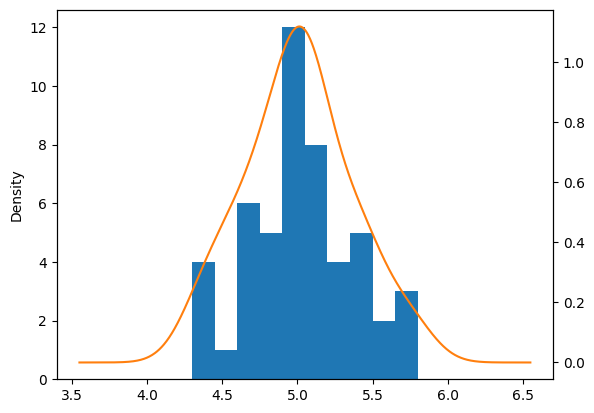

In [25]:

ax = seto_df['sepal length (cm)'].plot(kind='hist')
seto_df['sepal length (cm)'].plot(kind='kde',
                                  ax = ax,
                                  secondary_y=True)
plt.plot()

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
data = iris.data
label = iris.target

In [33]:
x_train,x_test,y_train,y_test = train_test_split(data,label)

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
m1 = GaussianNB()
m2 = KNeighborsClassifier()
m3 = LogisticRegression()
m4 = DecisionTreeClassifier()
m5 = RandomForestClassifier()
m6 = SVC()
for model in [m1,m2,m3,m4,m5,m6]:
  print("###",model.__class__.__name__)
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  print(accuracy_score(y_test,pred))

### GaussianNB
0.9210526315789473
### KNeighborsClassifier
0.9473684210526315
### LogisticRegression
0.9736842105263158
### DecisionTreeClassifier
0.9210526315789473
### RandomForestClassifier
0.9210526315789473
### SVC
0.9736842105263158


## 스팸필터 실습

In [67]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False},
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]
df = pd.DataFrame(email_list)

In [68]:
df

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False
6,free flight offer,True
7,hey traveler free flight deal,True
8,limited free game offer,True
9,today flight schedule,False


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['spam'])
df

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0
6,free flight offer,True,1
7,hey traveler free flight deal,True,1
8,limited free game offer,True,1
9,today flight schedule,False,0


In [71]:
sd = df['email title']
label = df['label']

In [72]:
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
cv = CountVectorizer()
data = cv.fit_transform(sd)

In [74]:
cv.get_feature_names_out()

array(['attached', 'card', 'cheapest', 'credit', 'deal', 'flight', 'free',
       'game', 'hey', 'limited', 'meeting', 'offer', 'only', 'schedule',
       'statement', 'time', 'today', 'traveler', 'your'], dtype=object)

In [75]:
data = data.toarray()

In [76]:
from sklearn.naive_bayes import BernoulliNB

In [90]:
x_train,x_test,y_train,y_test = train_test_split(data,label,
                                                 test_size=0.5)

In [91]:
model = BernoulliNB()
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.8333333333333334